## Population+Job Data Loading, Processing

In [1]:
import requests

In [2]:
import numpy as np
import pandas as pd

In [3]:
import geopandas as gpd

In [4]:
# Get TAZ data from jobpop data locally
jobpop = pd.read_csv('data_jobpop.csv')


In [5]:
jobpop.head()

,taz,pop2015,tot2015,jobpop2015,pop2050,tot2050,jobpop2050
0,1,805,85,890,1020,105,1125
1,2,1264,58,1322,1671,58,1729
2,3,823,72,895,985,71,1056
3,4,1388,115,1503,1796,116,1912
4,5,1367,53,1420,1448,39,1487


In [6]:
jp2050=jobpop[['taz','jobpop2050']].copy()

In [7]:
jp2050.head()

,taz,jobpop2050
0,1,1125
1,2,1729
2,3,1056
3,4,1912
4,5,1487


In [8]:
import matplotlib.pyplot as plt

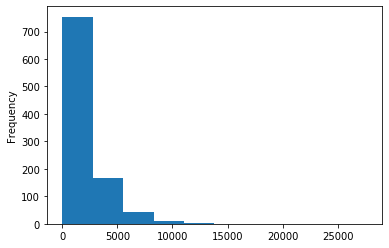

In [9]:
# Add a bar graph to the current (empty) Matplotlib chart
#plt.bar(['taz'], jp2050)

jp2050['jobpop2050'].plot.hist()

# Display the current chart
plt.show()

In [10]:
# add weight factor variable(column) to data
wt1=[]

for a in range(len(jp2050)):
    wt1.append(0)
    
len(wt1)

981

In [11]:
jp2050['WeightFac'] = wt1

jp2050.head()

,taz,jobpop2050,WeightFac
0,1,1125,0
1,2,1729,0
2,3,1056,0
3,4,1912,0
4,5,1487,0


In [12]:
# use 25%, 50%, and 75% as guides, set weight factors for each taz data

jp2050.jobpop2050.describe()
sta1=jp2050.jobpop2050.describe()

In [13]:
# Weight Factor Assignment

jp2050.loc[jp2050['jobpop2050'] <= sta1['25%'], 'WeightFac'] = -1.0
jp2050.loc[(jp2050['jobpop2050'] >= sta1['25%']) & (jp2050['jobpop2050'] <= sta1['50%']), 'WeightFac'] = 0.0
jp2050.loc[(jp2050['jobpop2050'] >= sta1['50%']) & (jp2050['jobpop2050'] <= sta1['75%']), 'WeightFac'] = 2.0
jp2050.loc[jp2050['jobpop2050'] >= sta1['75%'], 'WeightFac'] = 4.0

In [14]:
jp2050.head()

,taz,jobpop2050,WeightFac
0,1,1125,0.0
1,2,1729,0.0
2,3,1056,-1.0
3,4,1912,2.0
4,5,1487,0.0


## TAZ Data Loading + Processing

In [15]:
# download TAZ data from SFTCA

url = 'https://www.sfcta.org/sites/default/files/2019-06/TAZ981.zip'

with open('TAZ981.zip', 'wb') as f:
    r = requests.get(url)
    f.write(r.content)

In [16]:
taz = gpd.read_file('zip://TAZ981.zip')

In [17]:
taz['taz']=taz['TAZ']

In [18]:
taz.head()

,TAZ,geometry,taz
0,1,"POLYGON ((6007378.500054573 2086055.37391938, ...",1
1,2,"POLYGON ((5992137.499592379 2086335.12355164, ...",2
2,3,"POLYGON ((6004983.499220342 2086750.499936027,...",3
3,4,"POLYGON ((5994473.501130554 2087145.000032395,...",4
4,5,"POLYGON ((6006265.000917536 2086079.750239403,...",5


## TNC Data Loading + Processing

In [24]:
# Get TAZ data from TNC data locally
tnc = pd.read_csv('trip_stats_taz_0.csv')

In [25]:
tnc.head()

,taz,day_of_week,hour,pickups,dropoffs
0,1,0,3,0.6,0.4
1,1,0,4,0.0,0.4
2,1,0,5,0.6,0.6
3,1,0,6,0.8,1.0
4,1,0,7,0.6,0.8


In [26]:
# Group data by TAZ

tnc2=tnc.groupby('taz').mean()

In [27]:
len(tnc2)

981

In [28]:
type(tnc2)

pandas.core.frame.DataFrame

In [29]:
len(tnc)

164808

In [30]:
wt2=[]

for a in range(len(tnc2)):
    wt2.append(0)
    
len(wt2)

981

In [31]:
tnc2['WeightFac'] = wt2

tnc2.head()

,day_of_week,hour,pickups,dropoffs,WeightFac
taz,,,,,
1,3.0,14.5,0.674702,0.611012,0
2,3.0,14.5,1.423810,1.621131,0
3,3.0,14.5,0.836905,0.896429,0
4,3.0,14.5,3.828869,4.127976,0
5,3.0,14.5,0.661905,0.522321,0


In [32]:
tnc.pickups.describe()

count    164808.000000
mean          7.361588
std          10.608212
min           0.000000
25%           1.200000
50%           3.400000
75%           9.400000
max         201.750000
Name: pickups, dtype: float64

In [33]:
# use 25%, 50%, and 75% as guides, set weight factors for each taz data

sta=tnc2.pickups.describe()

In [34]:
sta['25%']

1.888690476190476

In [35]:
tnc2.head()

,day_of_week,hour,pickups,dropoffs,WeightFac
taz,,,,,
1,3.0,14.5,0.674702,0.611012,0
2,3.0,14.5,1.423810,1.621131,0
3,3.0,14.5,0.836905,0.896429,0
4,3.0,14.5,3.828869,4.127976,0
5,3.0,14.5,0.661905,0.522321,0


In [36]:
tnc2.columns

Index(['day_of_week', 'hour', 'pickups', 'dropoffs', 'WeightFac'], dtype='object')

In [38]:
# average pickups+dropoffs

tnc2['pick_drop']=(tnc2['pickups']+tnc2['dropoffs'])/2

In [39]:
# Weight Factor Assignment

tnc2.loc[tnc2['pick_drop'] <= sta['25%'], 'WeightFac'] = -1.0
tnc2.loc[(tnc2['pick_drop'] >= sta['25%']) & (tnc2['pick_drop'] <= sta['50%']), 'WeightFac'] = 0.0
tnc2.loc[(tnc2['pick_drop'] >= sta['50%']) & (tnc2['pick_drop'] <= sta['75%']), 'WeightFac'] = 2.0
tnc2.loc[tnc2['pick_drop'] >= sta['75%'], 'WeightFac'] = 4.0

In [40]:
tnc2.head()

,day_of_week,hour,pickups,dropoffs,WeightFac,pick_drop
taz,,,,,,
1,3.0,14.5,0.674702,0.611012,-1.0,0.642857
2,3.0,14.5,1.423810,1.621131,-1.0,1.522470
3,3.0,14.5,0.836905,0.896429,-1.0,0.866667
4,3.0,14.5,3.828869,4.127976,0.0,3.978423
5,3.0,14.5,0.661905,0.522321,-1.0,0.592113


## Plotting Job and Population Data Results on SF Map

In [42]:
jobpop_plot = taz.copy(deep=True)
jobpop_plot = jobpop_plot.merge(jp2050, on='taz')
jobpop_plot.head()

,TAZ,geometry,taz,jobpop2050,WeightFac
0,1,"POLYGON ((6007378.500054573 2086055.37391938, ...",1,1125,0.0
1,2,"POLYGON ((5992137.499592379 2086335.12355164, ...",2,1729,0.0
2,3,"POLYGON ((6004983.499220342 2086750.499936027,...",3,1056,-1.0
3,4,"POLYGON ((5994473.501130554 2087145.000032395,...",4,1912,2.0
4,5,"POLYGON ((6006265.000917536 2086079.750239403,...",5,1487,0.0


In [43]:
# normalize tnc2 data by taz AREA

jobpop_plot['AREA1']=jobpop_plot['geometry'].area
jobpop_plot['jobpop_AREA']=jobpop_plot['jobpop2050']/jobpop_plot['AREA1']
jobpop_plot['WtFac_AREA1']=jobpop_plot['WeightFac']/jobpop_plot['AREA1']

In [45]:
jobpop_plot.head()

,TAZ,geometry,taz,jobpop2050,WeightFac,AREA1,jobpop_AREA,WtFac_AREA1
0,1,"POLYGON ((6007378.500054573 2086055.37391938, ...",1,1125,0.0,9.310735e+05,0.001208,0.000000e+00
1,2,"POLYGON ((5992137.499592379 2086335.12355164, ...",2,1729,0.0,1.825218e+06,0.000947,0.000000e+00
2,3,"POLYGON ((6004983.499220342 2086750.499936027,...",3,1056,-1.0,1.360855e+06,0.000776,-7.348322e-07
3,4,"POLYGON ((5994473.501130554 2087145.000032395,...",4,1912,2.0,1.596024e+06,0.001198,1.253114e-06
4,5,"POLYGON ((6006265.000917536 2086079.750239403,...",5,1487,0.0,1.064261e+06,0.001397,0.000000e+00


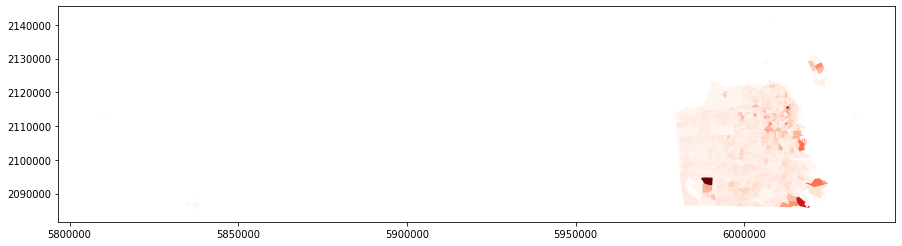

In [46]:
# Plot TNC Data on MAP

jobpop_plot.plot(column='jobpop2050',figsize=(15, 15),cmap='Reds',legend=False)

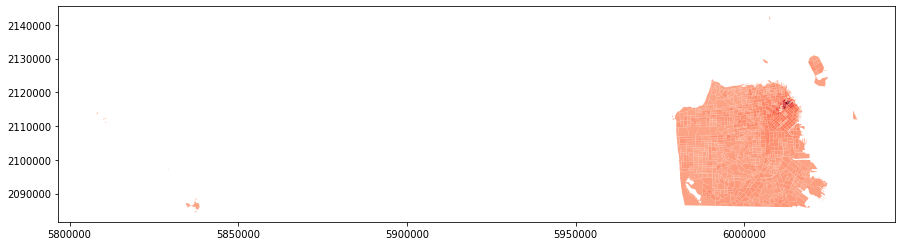

In [48]:
# Plot TNC Data WEIGHT FACTOR on MAP

jobpop_plot.plot(column='WtFac_AREA1',figsize=(15, 15),cmap='Reds',legend=False)

## Plotting TNC Data Results on SF Map


In [41]:
tnc_plot = taz.copy(deep=True)
tnc_plot = tnc_plot.merge(tnc2, on='taz')
tnc_plot.head()

,TAZ,geometry,taz,day_of_week,hour,pickups,dropoffs,WeightFac,pick_drop
0,1,"POLYGON ((6007378.500054573 2086055.37391938, ...",1,3.0,14.5,0.674702,0.611012,-1.0,0.642857
1,2,"POLYGON ((5992137.499592379 2086335.12355164, ...",2,3.0,14.5,1.423810,1.621131,-1.0,1.522470
2,3,"POLYGON ((6004983.499220342 2086750.499936027,...",3,3.0,14.5,0.836905,0.896429,-1.0,0.866667
3,4,"POLYGON ((5994473.501130554 2087145.000032395,...",4,3.0,14.5,3.828869,4.127976,0.0,3.978423
4,5,"POLYGON ((6006265.000917536 2086079.750239403,...",5,3.0,14.5,0.661905,0.522321,-1.0,0.592113


In [49]:
# normalize tnc2 data by taz AREA

tnc_plot['AREA2']=tnc_plot['geometry'].area
tnc_plot['tnc_AREA']=tnc_plot['pick_drop']/tnc_plot['AREA2']
tnc_plot['WtFac_AREA2']=tnc_plot['pick_drop']/tnc_plot['AREA2']

In [50]:
tnc_plot.head()

,TAZ,geometry,taz,day_of_week,hour,pickups,dropoffs,WeightFac,pick_drop,AREA2,tnc_AREA,WtFac_AREA2
0,1,"POLYGON ((6007378.500054573 2086055.37391938, ...",1,3.0,14.5,0.674702,0.611012,-1.0,0.642857,9.310735e+05,6.904473e-07,6.904473e-07
1,2,"POLYGON ((5992137.499592379 2086335.12355164, ...",2,3.0,14.5,1.423810,1.621131,-1.0,1.522470,1.825218e+06,8.341307e-07,8.341307e-07
2,3,"POLYGON ((6004983.499220342 2086750.499936027,...",3,3.0,14.5,0.836905,0.896429,-1.0,0.866667,1.360855e+06,6.368546e-07,6.368546e-07
3,4,"POLYGON ((5994473.501130554 2087145.000032395,...",4,3.0,14.5,3.828869,4.127976,0.0,3.978423,1.596024e+06,2.492709e-06,2.492709e-06
4,5,"POLYGON ((6006265.000917536 2086079.750239403,...",5,3.0,14.5,0.661905,0.522321,-1.0,0.592113,1.064261e+06,5.563609e-07,5.563609e-07


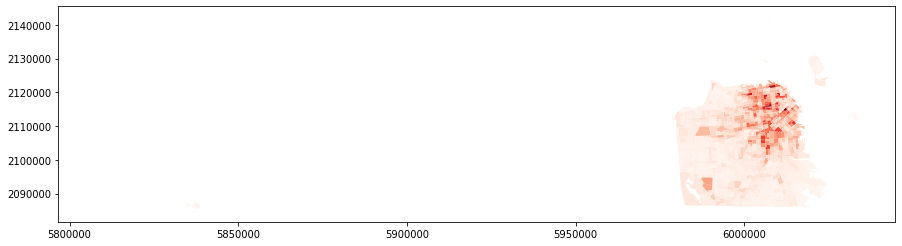

In [51]:
# Plot TNC Data on MAP

tnc_plot.plot(column='pick_drop',figsize=(15, 15),cmap='Reds',legend=False)

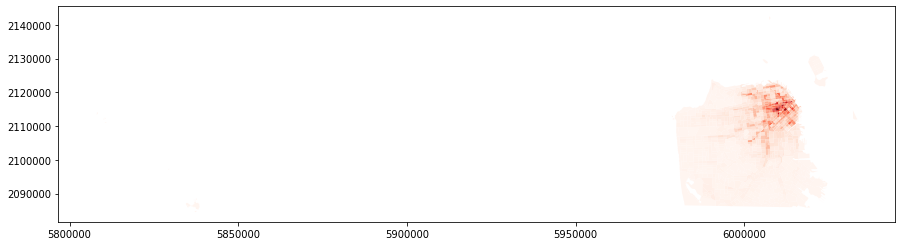

In [53]:
# Plot TNC Data WEIGHT FACTOR on MAP

tnc_plot.plot(column='WtFac_AREA2',figsize=(15, 15),cmap='Reds',legend=False)